# Introdução

Dados do spotify com 20594 elementos e 24 colunas.

Links Relevantes:

https://developer.spotify.com/documentation/web-api/reference/get-audio-features

https://www.kaggle.com/datasets/sanjanchaudhari/spotify-dataset/data


| Atributo                         | Descrição                                                                                         |
| -------------------------------- | ------------------------------------------------------------------------------------------------- |
| **Duration\_ms / Duration\_min** | Duração da música em milissegundos ou minutos.                                                    |
| **Danceability**                 | Quão dançável é a faixa, de 0 a 1. Combina tempo, estabilidade do ritmo, força do beat, etc.      |
| **Energy**                       | Intensidade e atividade da música. Mais energia = mais animada. Vai de 0 a 1.                     |
| **Loudness**                     | Volume médio em decibéis (dB). Geralmente valores negativos.                                      |
| **Speechiness**                  | Indica a presença de palavras faladas (raps, podcasts, etc.). Vai de 0 a 1.                       |
| **Acousticness**                 | Probabilidade de a faixa ser acústica. Valores mais altos indicam sons mais "limpos" e acústicos. |
| **Instrumentalness**             | Estimativa de ausência de vocais. Valores próximos a 1 indicam que provavelmente não há voz.      |
| **Liveness**                     | Probabilidade de a música ser gravada ao vivo.                                                    |
| **Valence**                      | Positividade emocional da música. 0 é triste/deprimente, 1 é alegre/positiva.                     |
| **Tempo**                        | BPM (batidas por minuto) da faixa.                                                                |
| **Key**                          | Representa a tonalidade da faixa (0 = C, 1 = C♯/D♭, ..., 11 = B).                                 |
| **Mode**                         | Modo da escala: maior (1) ou menor (0).                                                           |
| **Popularity**                   | Pontuação de popularidade da faixa (geralmente de 0 a 100).                                       |


In [ ]:
pip install hdbscan

In [ ]:
import kagglehub
import os
import pandas as pd
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
image_dir_path = kagglehub.dataset_download("sanjanchaudhari/spotify-dataset")

print(image_dir_path)

100%|██████████| 1.95M/1.95M [00:00<00:00, 106MB/s]

Extracting files...
/root/.cache/kagglehub/datasets/sanjanchaudhari/spotify-dataset/versions/1


In [ ]:
df.select_dtypes(include='number').columns

Index(['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_min',
       'Views', 'Likes', 'Comments', 'Stream', 'EnergyLiveness'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Artist,0
Track,0
Album,0
Album_type,0
Danceability,0
Energy,0
Loudness,0
Speechiness,0
Acousticness,0
Instrumentalness,0


In [ ]:
df.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
count,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,2.059400e+04,2.059400e+04,2.059400e+04,2.059400e+04,20592.000000
mean,0.620102,0.635176,-7.678254,0.096733,0.291391,0.056162,0.193653,0.530077,120.562616,3.742439,9.203740e+07,6.479902e+05,2.684679e+04,1.326446e+08,5.167227
std,0.165504,0.214274,4.639481,0.112182,0.286117,0.193622,0.168832,0.245542,29.588093,2.085211,2.726026e+08,1.773648e+06,1.911751e+05,2.423582e+08,4.117431
min,0.000000,0.000000,-46.251000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000049
25%,0.519000,0.507000,-8.868000,0.035700,0.045200,0.000000,0.094100,0.340000,96.994000,2.996746,1.478284e+06,1.754200e+04,4.060000e+02,1.559098e+07,2.386190
50%,0.638000,0.666000,-6.540500,0.050650,0.193000,0.000002,0.125000,0.538000,119.959000,3.551267,1.331348e+07,1.153155e+05,3.006000e+03,4.730525e+07,4.256881
75%,0.741000,0.798000,-4.935000,0.104000,0.476750,0.000474,0.237000,0.727000,139.923500,4.202163,6.739682e+07,5.000198e+05,1.373675e+04,1.343453e+08,6.822034
max,0.975000,1.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,77.934300,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09,59.113924


In [ ]:
# Preencher valores nulos com a mediana
df['EnergyLiveness'].fillna(df['EnergyLiveness'].median(), inplace=True)

df.isnull().sum()

/tmp/ipython-input-31-3394586865.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EnergyLiveness'].fillna(df['EnergyLiveness'].median(), inplace=True)


,0
Artist,0
Track,0
Album,0
Album_type,0
Danceability,0
Energy,0
Loudness,0
Speechiness,0
Acousticness,0
Instrumentalness,0


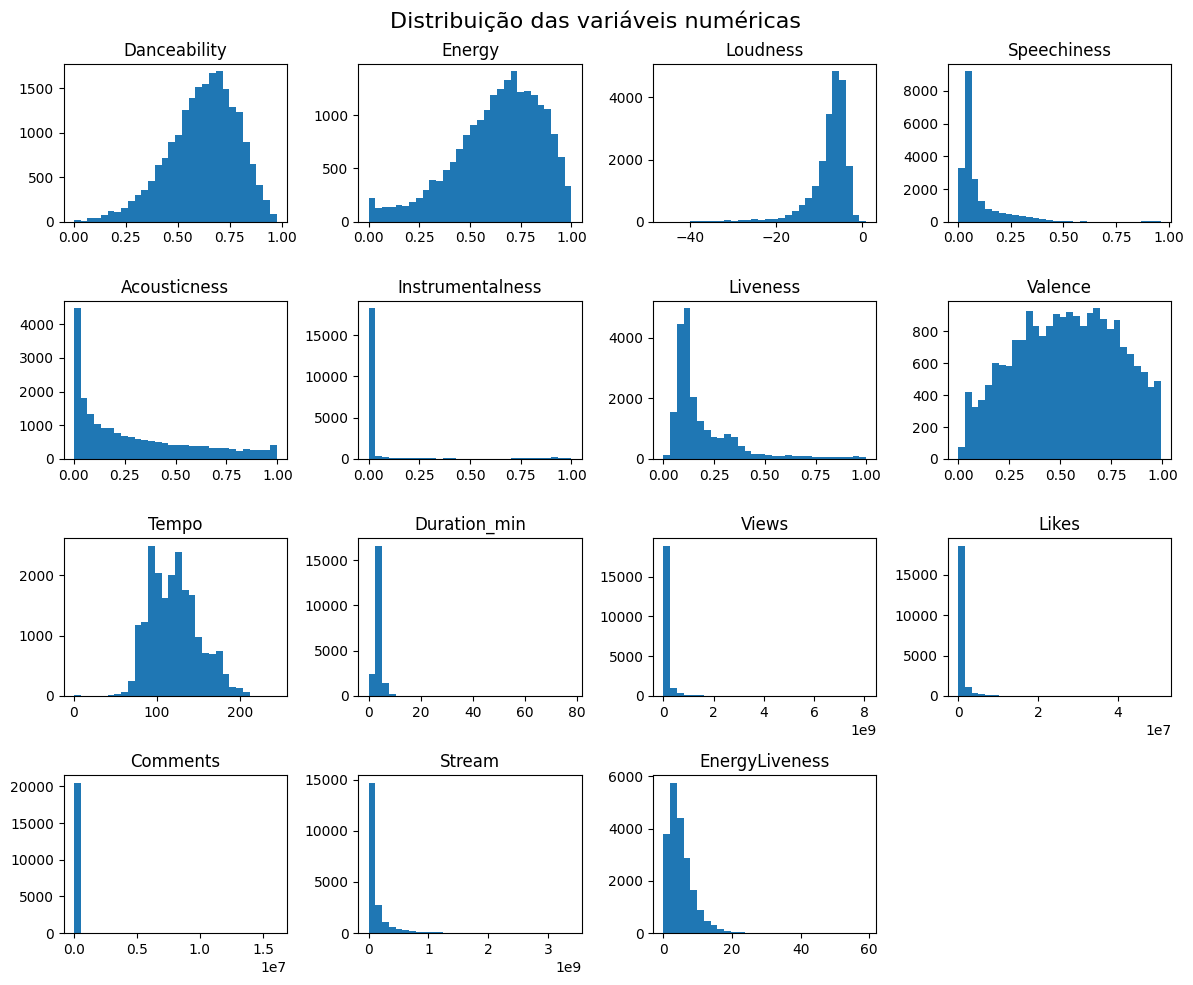

In [ ]:
df.hist(bins=30, figsize=(12, 10), grid=False)
plt.suptitle("Distribuição das variáveis numéricas", fontsize=16)
plt.tight_layout()
plt.show()

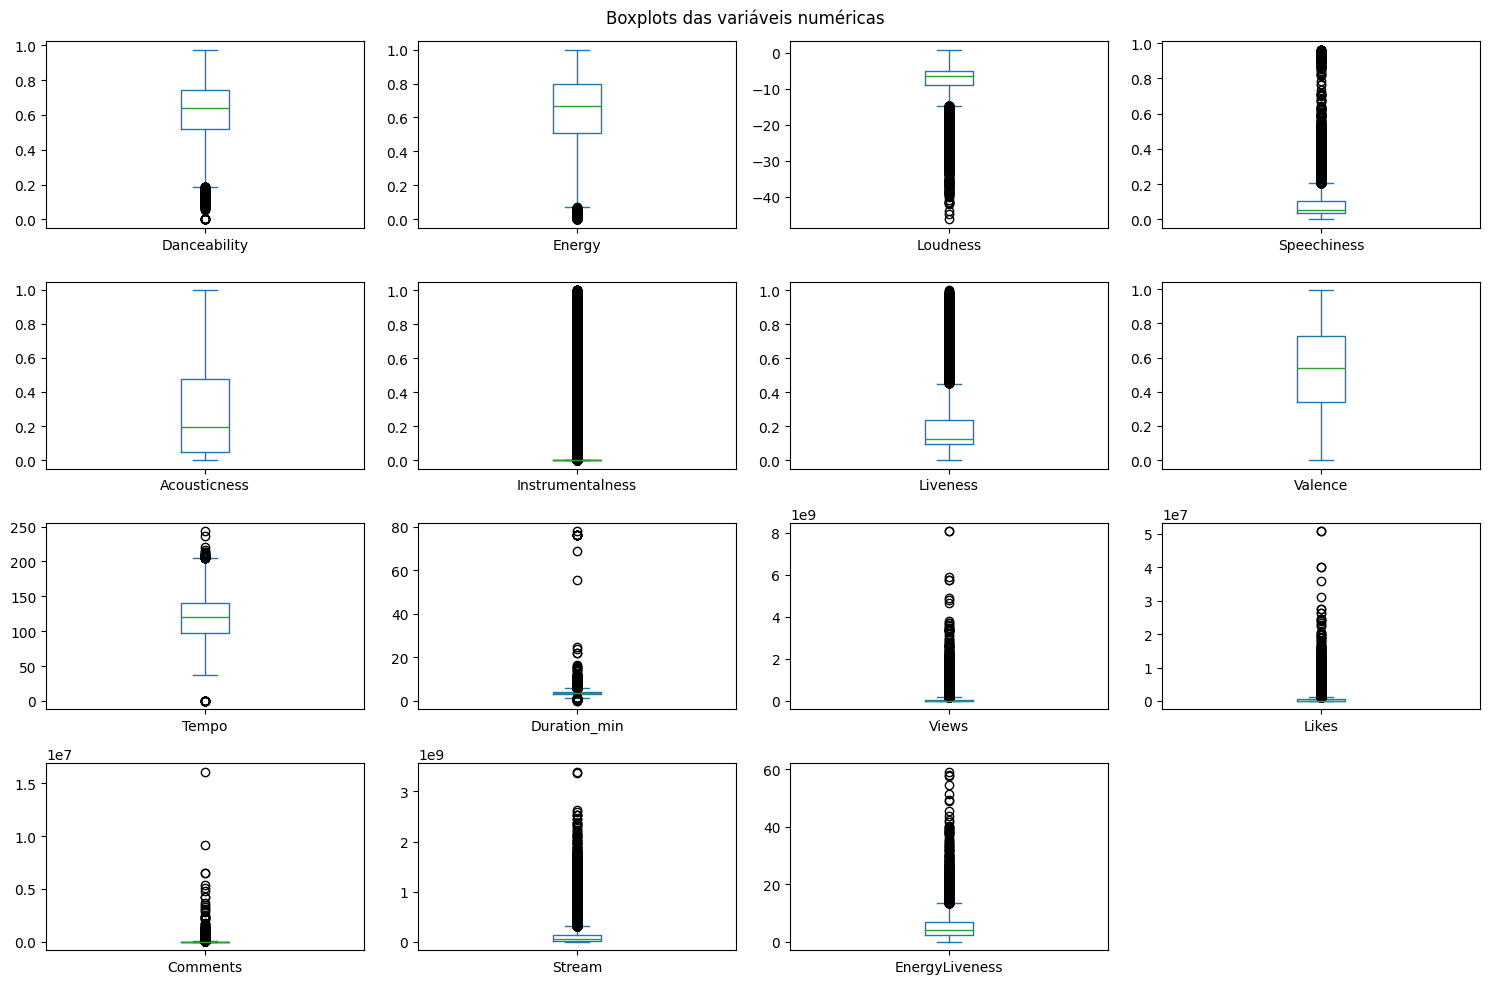

In [ ]:
df.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False, sharey=False)
plt.suptitle("Boxplots das variáveis numéricas")
plt.tight_layout()
plt.show()

In [ ]:
colunas_numericas = df.select_dtypes(include=['number']).columns

# Cria uma cópia que será filtrada progressivamente
df_cleaned_iqr_filter = df.copy()

# Aplica o filtro IQR acumulativo
for coluna in colunas_numericas:
    Q1 = df_cleaned_iqr_filter[coluna].quantile(0.25)
    Q3 = df_cleaned_iqr_filter[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df_cleaned_iqr_filter = df_cleaned_iqr_filter[
        (df_cleaned_iqr_filter[coluna] >= limite_inferior) &
        (df_cleaned_iqr_filter[coluna] <= limite_superior)
    ]

# Verifica resultado
print(df_cleaned_iqr_filter.shape)

(7675, 24)


In [ ]:
df_cleaned = df.copy()

df_cleaned = df[
    (df['Duration_min'] > 0) &
    (df['Tempo'] > 0) &
    (df['Views'] > 0) &
    (df['Stream'] > 0)
]

In [ ]:
print(df_cleaned.shape)

(19551, 24)


In [ ]:
colunas_popularidade = ['Views', 'Likes', 'Comments', 'Stream']

# Cria a cópia removendo essas colunas
df_analise = df_cleaned.drop(columns=colunas_popularidade)

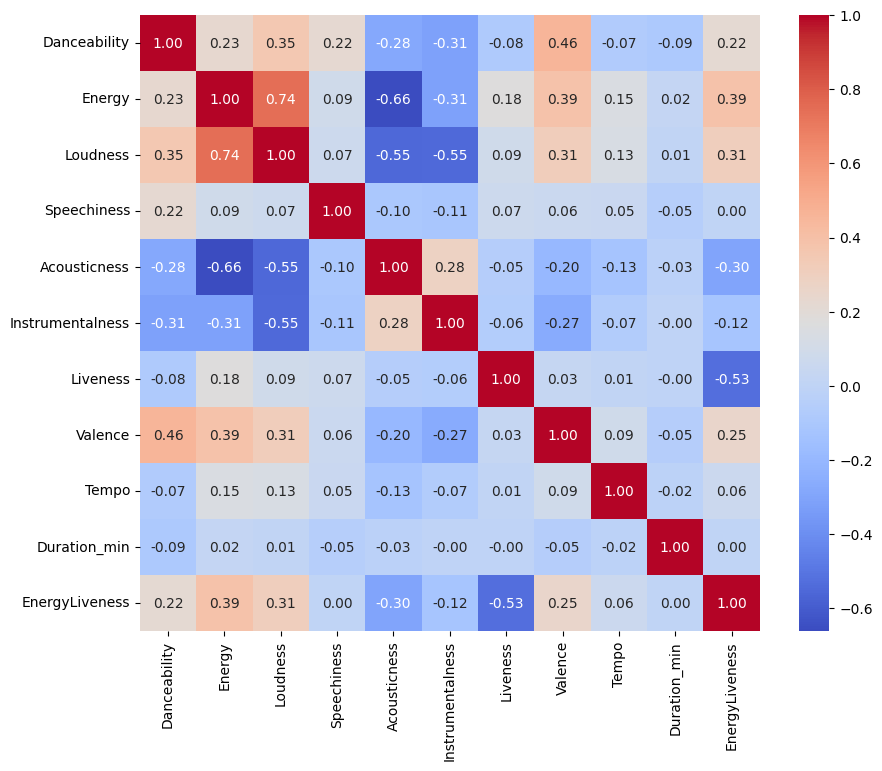

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_analise.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

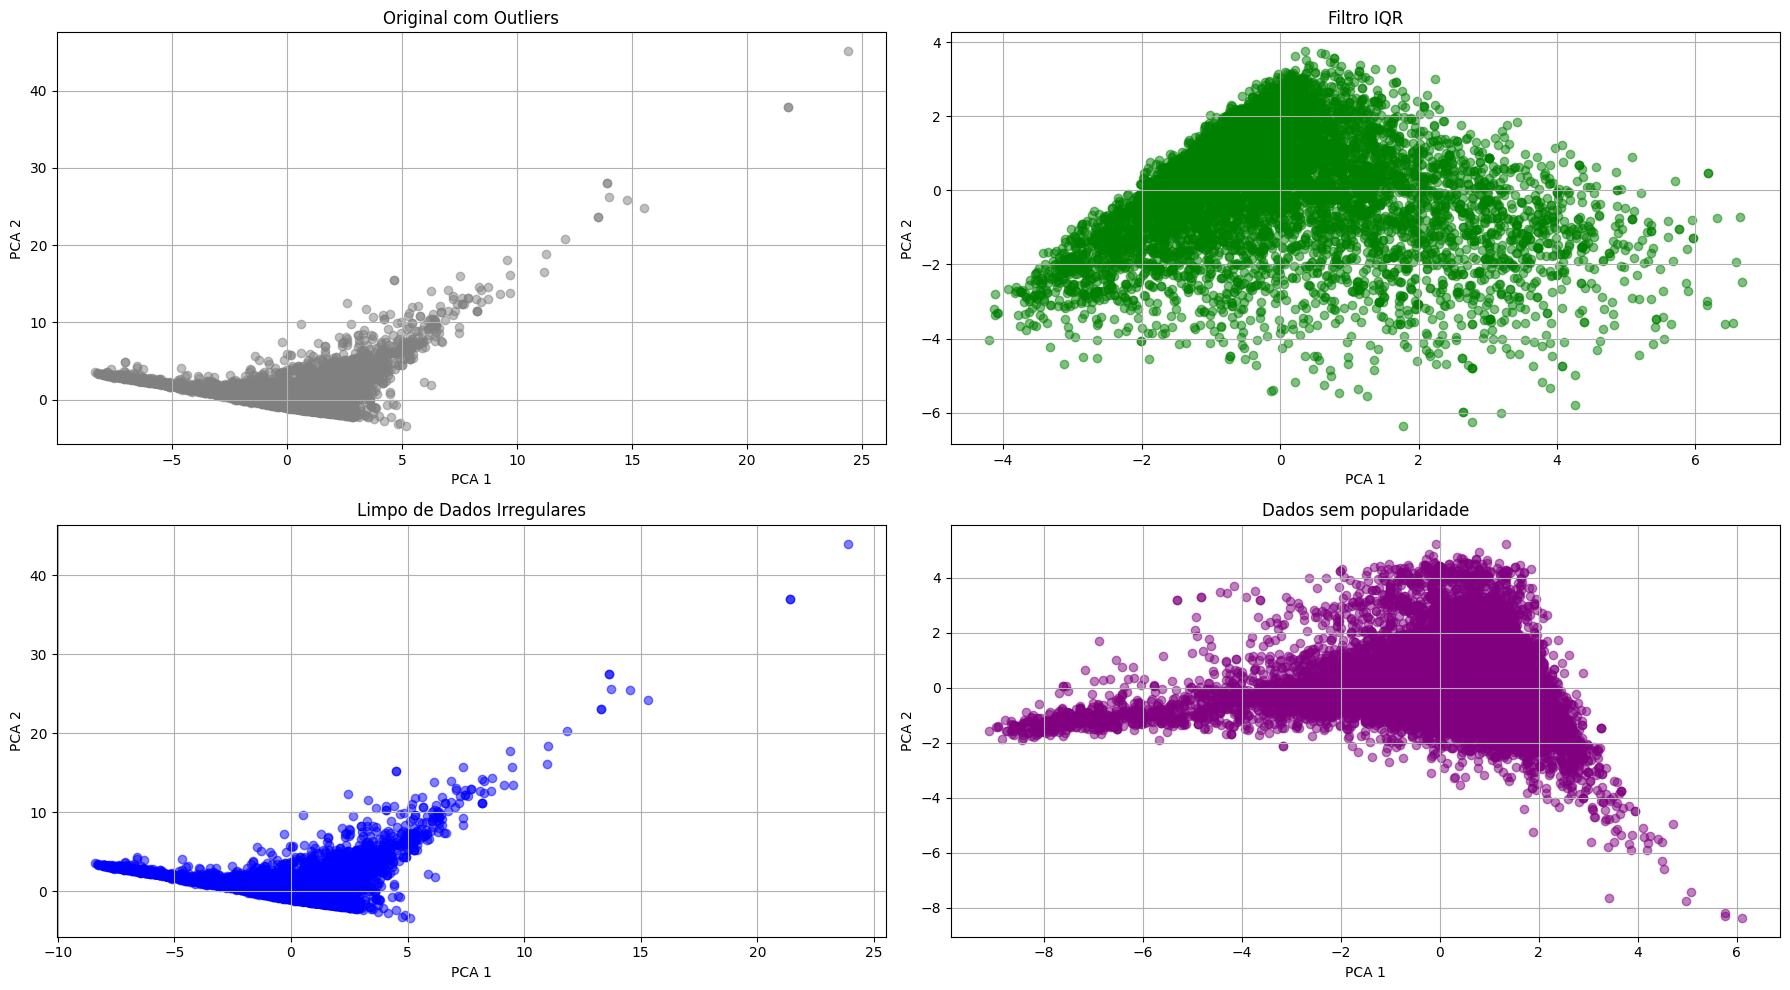

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalização
X1 = df.select_dtypes(include='number').dropna()
X2 = df_cleaned_iqr_filter.select_dtypes(include='number').dropna()
X3 = df_cleaned.select_dtypes(include='number').dropna()
X4 = df_analise.select_dtypes(include='number').dropna()

X1_scaled = StandardScaler().fit_transform(X1)
X2_scaled = StandardScaler().fit_transform(X2)
X3_scaled = StandardScaler().fit_transform(X3)
X4_scaled = StandardScaler().fit_transform(X4)

# PCA
pca = PCA(n_components=2)
X1_pca = pca.fit_transform(X1_scaled)
X2_pca = pca.fit_transform(X2_scaled)
X3_pca = pca.fit_transform(X3_scaled)
X4_pca = pca.fit_transform(X4_scaled)

# Plots lado a lado
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

axs[0][0].scatter(X1_pca[:, 0], X1_pca[:, 1], alpha=0.5, color='gray')
axs[0][0].set_title('Original com Outliers')
axs[0][0].set_xlabel('PCA 1')
axs[0][0].set_ylabel('PCA 2')
axs[0][0].grid(True)

axs[0][1].scatter(X2_pca[:, 0], X2_pca[:, 1], alpha=0.5, color='green')
axs[0][1].set_title('Filtro IQR')
axs[0][1].set_xlabel('PCA 1')
axs[0][1].set_ylabel('PCA 2')
axs[0][1].grid(True)

axs[1][0].scatter(X3_pca[:, 0], X3_pca[:, 1], alpha=0.5, color='blue')
axs[1][0].set_title('Limpo de Dados Irregulares')
axs[1][0].set_xlabel('PCA 1')
axs[1][0].set_ylabel('PCA 2')
axs[1][0].grid(True)

axs[1][1].scatter(X4_pca[:, 0], X4_pca[:, 1], alpha=0.5, color='purple')
axs[1][1].set_title('Dados sem popularidade')
axs[1][1].set_xlabel('PCA 1')
axs[1][1].set_ylabel('PCA 2')
axs[1][1].grid(True)

plt.tight_layout()
plt.show()



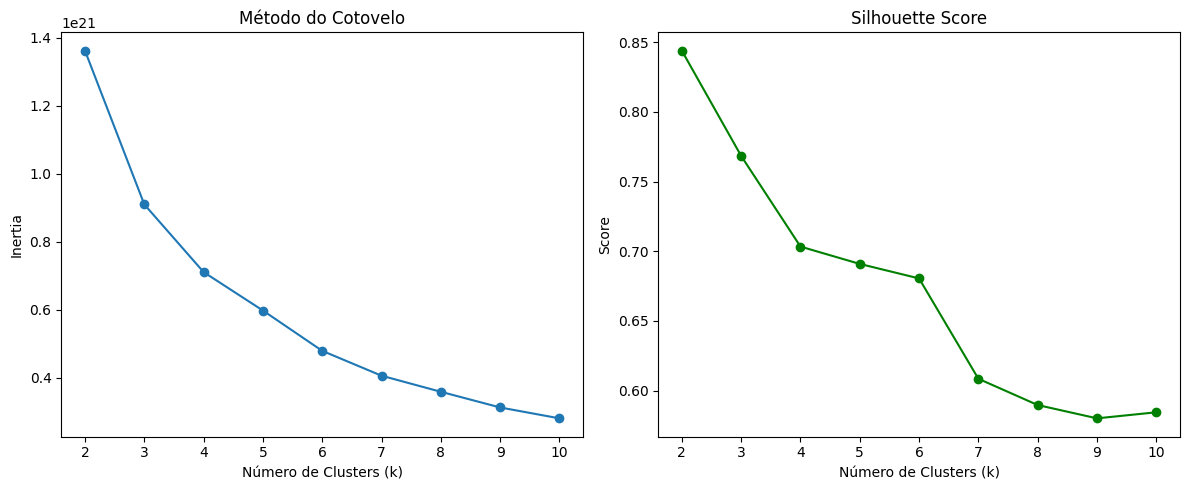

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

numeric_columns = df_cleaned.select_dtypes(include='number').columns

temp = df_cleaned[numeric_columns].copy()

#Testar diferentes valores de K
inertias = []
silhouettes = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(temp)

    inertias.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(temp, labels)
    silhouettes.append(silhouette_avg)

# Plotar os resultados
plt.figure(figsize=(12, 5))

# Método do cotovelo
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

In [ ]:
# usando clusterização com 6 grupos
kmeans6 = KMeans(n_clusters=6, random_state=0)
labels6 = kmeans6.fit_predict(X3_scaled)

# com 3
kmeans3 = KMeans(n_clusters=3, random_state=0)
labels3 = kmeans3.fit_predict(X3_scaled)

# Adiciona os rótulos ao DataFrame original
df_cleaned['Cluster_kmeans6'] = labels6
df_cleaned['Cluster_kmeans3'] = labels3

/tmp/ipython-input-41-1432846166.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster_kmeans6'] = labels6
/tmp/ipython-input-41-1432846166.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster_kmeans3'] = labels3


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


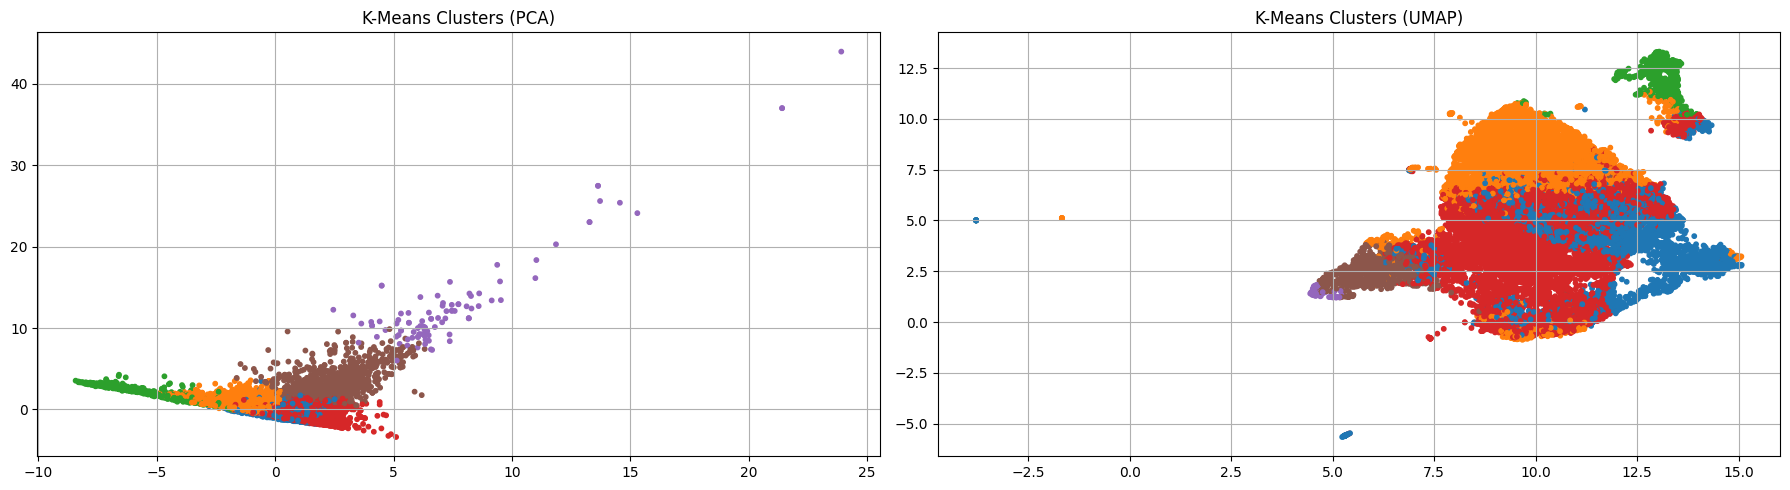

In [ ]:
# UMAP
reducer_umap = umap.UMAP(n_components=2,n_neighbors=30, random_state=0)
X_umap = reducer_umap.fit_transform(X3_scaled)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X3_scaled)


# Cores para clusters
colors = plt.cm.tab10(df_cleaned['Cluster_kmeans6'] % 10)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=10)
axs[0].set_title('K-Means Clusters (PCA)')
axs[0].grid(True)

axs[1].scatter(X_umap[:, 0], X_umap[:, 1], c=colors, s=10)
axs[1].set_title('K-Means Clusters (UMAP)')
axs[1].grid(True)

plt.tight_layout()
plt.show()

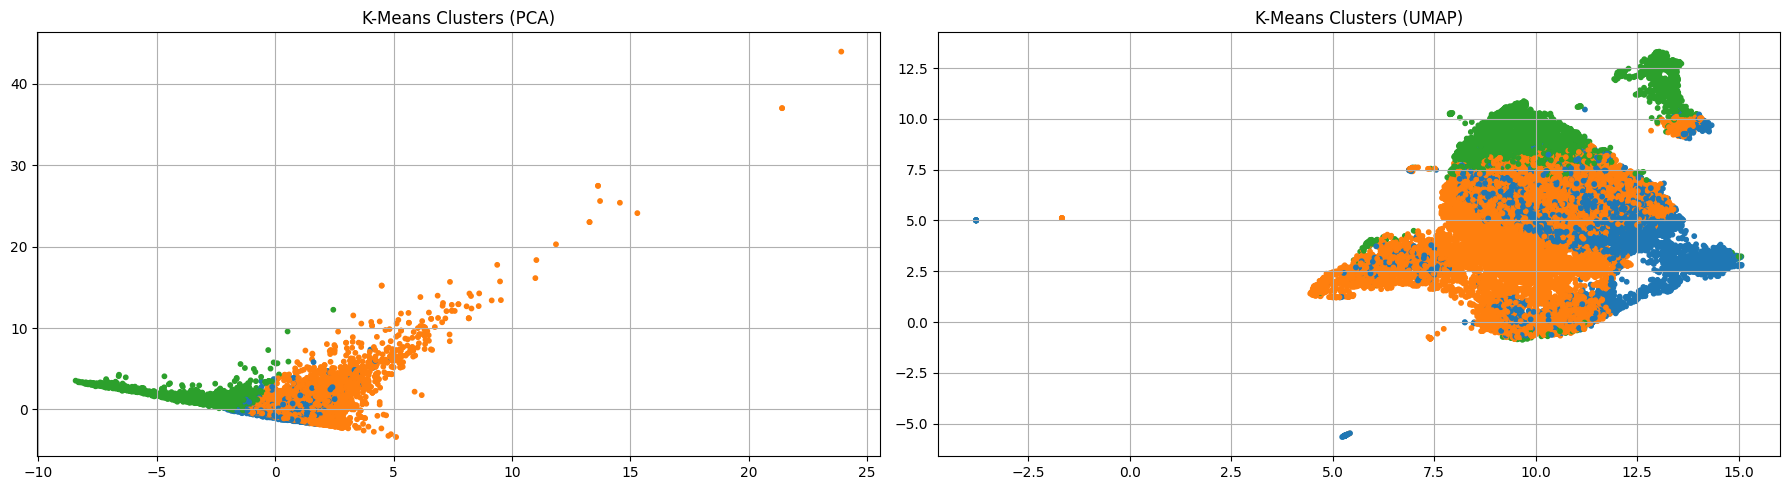

In [ ]:
# Cores para clusters
colors = plt.cm.tab10(df_cleaned['Cluster_kmeans3'] % 10)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=10)
axs[0].set_title('K-Means Clusters (PCA)')
axs[0].grid(True)

axs[1].scatter(X_umap[:, 0], X_umap[:, 1], c=colors, s=10)
axs[1].set_title('K-Means Clusters (UMAP)')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
sil_score3 = silhouette_score(X3_scaled, labels3)
calinski_score3 = calinski_harabasz_score(X3_scaled, labels3)
davies_score3 = davies_bouldin_score(X3_scaled, labels3)

sil_score6 = silhouette_score(X3_scaled, labels6)
calinski_score6 = calinski_harabasz_score(X3_scaled, labels6)
davies_score6 = davies_bouldin_score(X3_scaled, labels6)

print('Com 3 grupos:')
print(f"Silhouette: {sil_score3:.3f}")
print(f"Calinski-Harabasz: {calinski_score3:.3f}")
print(f"Davies-Bouldin: {davies_score3:.3f}")
print('Com 6 grupos:')
print(f"Silhouette: {sil_score6:.3f}")
print(f"Calinski-Harabasz: {calinski_score6:.3f}")
print(f"Davies-Bouldin: {davies_score6:.3f}")

Com 3 grupos:
Silhouette: 0.123
Calinski-Harabasz: 2345.268
Davies-Bouldin: 2.214
Com 6 grupos:
Silhouette: 0.158
Calinski-Harabasz: 2502.714
Davies-Bouldin: 1.613


In [ ]:
# Configura o clusterer HDBSCAN com parâmetros ajustados
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=50,
    min_samples=5,
    cluster_selection_epsilon=64,
    metric='euclidean'
)

# Executa o clustering e adiciona os labels ao DataFrame
df_cleaned['Cluster_hdbscan'] = clusterer.fit_predict(X3_scaled)

# Visualiza a quantidade de clusters e outliers
labels = df_cleaned['Cluster_hdbscan'].values
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
num_outliers = (labels == -1).sum()

print(f"Clusters encontrados: {num_clusters}")
print(f"Outliers detectados: {num_outliers}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clusters encontrados: 2
Outliers detectados: 4413


/tmp/ipython-input-45-537458395.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster_hdbscan'] = clusterer.fit_predict(X3_scaled)


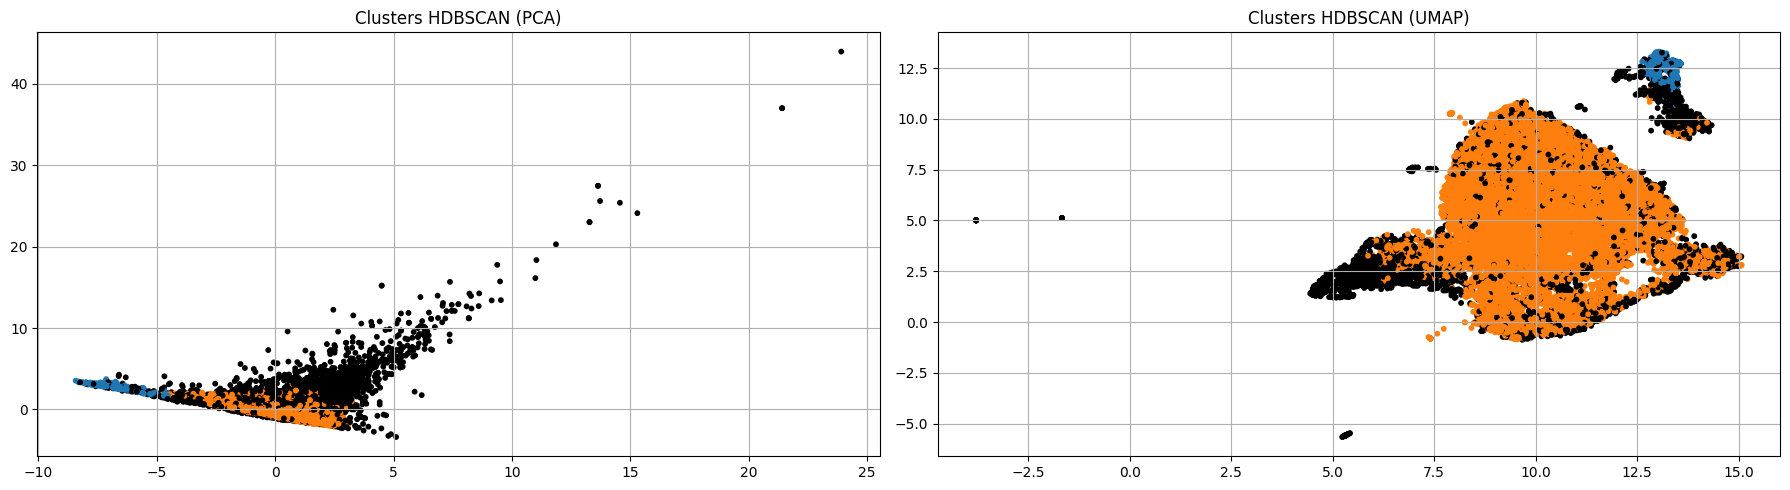

In [ ]:
# Cores padrão para clusters (mod 10 para limitar o colormap)
colors = plt.cm.tab10(labels % 10)

# Trocar cor dos outliers (-1) para preto
colors = np.array(colors)
colors[labels == -1] = [0, 0, 0, 1]  # RGBA preto

# Plot
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=10)
axs[0].set_title('Clusters HDBSCAN (PCA)')
axs[0].grid(True)

axs[1].scatter(X_umap[:, 0], X_umap[:, 1], c=colors, s=10)
axs[1].set_title('Clusters HDBSCAN (UMAP)')
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
df_cleaned['Cluster_hdbscan'].value_counts()

,count
Cluster_hdbscan,
1,14730
-1,4413
0,408


In [ ]:
from sklearn.metrics import silhouette_score

# Máscara para remover outliers
mask = labels != -1

# Aplica o Silhouette Score apenas nos clusters válidos
sil_score = silhouette_score(X3_scaled[mask], labels[mask])
print(f"Silhouette Score (sem outliers): {sil_score:.4f}")


Silhouette Score (sem outliers): 0.5539


In [ ]:
from hdbscan.validity import validity_index

# Aplica o índice de validade DBCV (também excluindo outliers)
dbcv_score = validity_index(X3_scaled[mask], labels[mask], metric='euclidean')
print(f"DBCV: {dbcv_score:.4f}")


DBCV: -0.1126


# Sem Popularidade

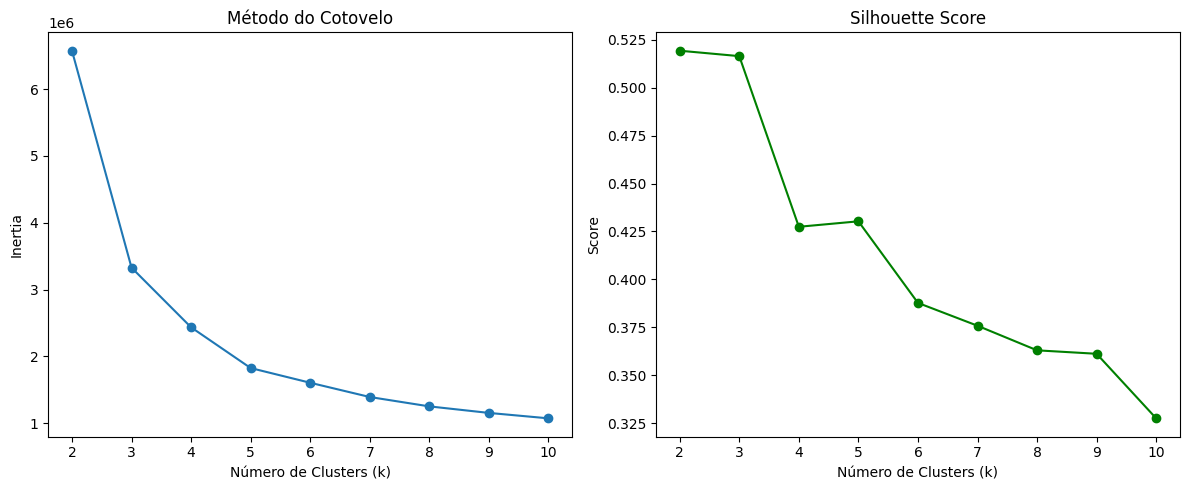

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

numeric_columns = df_analise.select_dtypes(include='number').columns

temp = df_analise[numeric_columns].copy()

# Testar diferentes valores de K
inertias = []
silhouettes = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(temp)

    inertias.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(temp, labels)
    silhouettes.append(silhouette_avg)

# Plotar os resultados
plt.figure(figsize=(12, 5))

# Método do cotovelo
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X4_scaled)

# Adiciona os rótulos ao DataFrame original
df_analise['Cluster_kmeans'] = labels

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


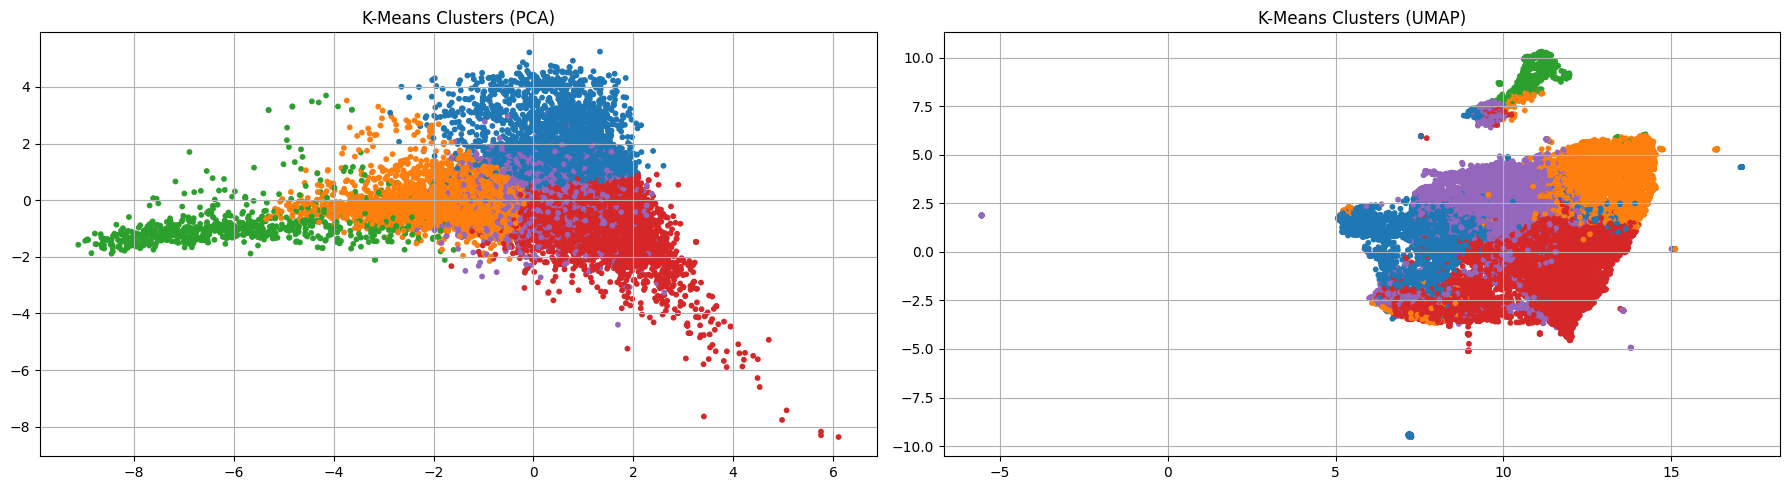

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# UMAP
reducer_umap2 = umap.UMAP(n_components=2,n_neighbors=30, random_state=0)
X_umap2 = reducer_umap2.fit_transform(X4_scaled)

# PCA
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X4_scaled)


# Cores para clusters
colors = plt.cm.tab10(df_analise['Cluster_kmeans'] % 10)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

axs[0].scatter(X_pca2[:, 0], X_pca2[:, 1], c=colors, s=10)
axs[0].set_title('K-Means Clusters (PCA)')
axs[0].grid(True)

axs[1].scatter(X_umap2[:, 0], X_umap2[:, 1], c=colors, s=10)
axs[1].set_title('K-Means Clusters (UMAP)')
axs[1].grid(True)


plt.tight_layout()
plt.show()


In [ ]:
sil_score3 = silhouette_score(X4_scaled, labels)
calinski_score3 = calinski_harabasz_score(X4_scaled, labels)
davies_score3 = davies_bouldin_score(X4_scaled, labels)

print('Com 5 grupos:')
print(f"Silhouette: {sil_score3:.3f}")
print(f"Calinski-Harabasz: {calinski_score3:.3f}")
print(f"Davies-Bouldin: {davies_score3:.3f}")


Com 5 grupos:
Silhouette: 0.151
Calinski-Harabasz: 3058.858
Davies-Bouldin: 1.774


In [ ]:
# Configura o clusterer HDBSCAN com parâmetros ajustados
clusterer2 = hdbscan.HDBSCAN(
    min_cluster_size=50,
    min_samples=2,
    cluster_selection_epsilon=1,
    metric='euclidean',
    cluster_selection_method='leaf'
)

# Executa o clustering e adiciona os labels ao DataFrame
df_analise['Cluster_hdbscan'] = clusterer2.fit_predict(X4_scaled)

# Visualiza a quantidade de clusters e outliers
labels = df_analise['Cluster_hdbscan'].values
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
num_outliers = (labels == -1).sum()

print(f"Clusters encontrados: {num_clusters}")
print(f"Outliers detectados: {num_outliers}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clusters encontrados: 5
Outliers detectados: 5416


In [ ]:
X4.columns

Index(['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_min',
       'EnergyLiveness'],
      dtype='object')

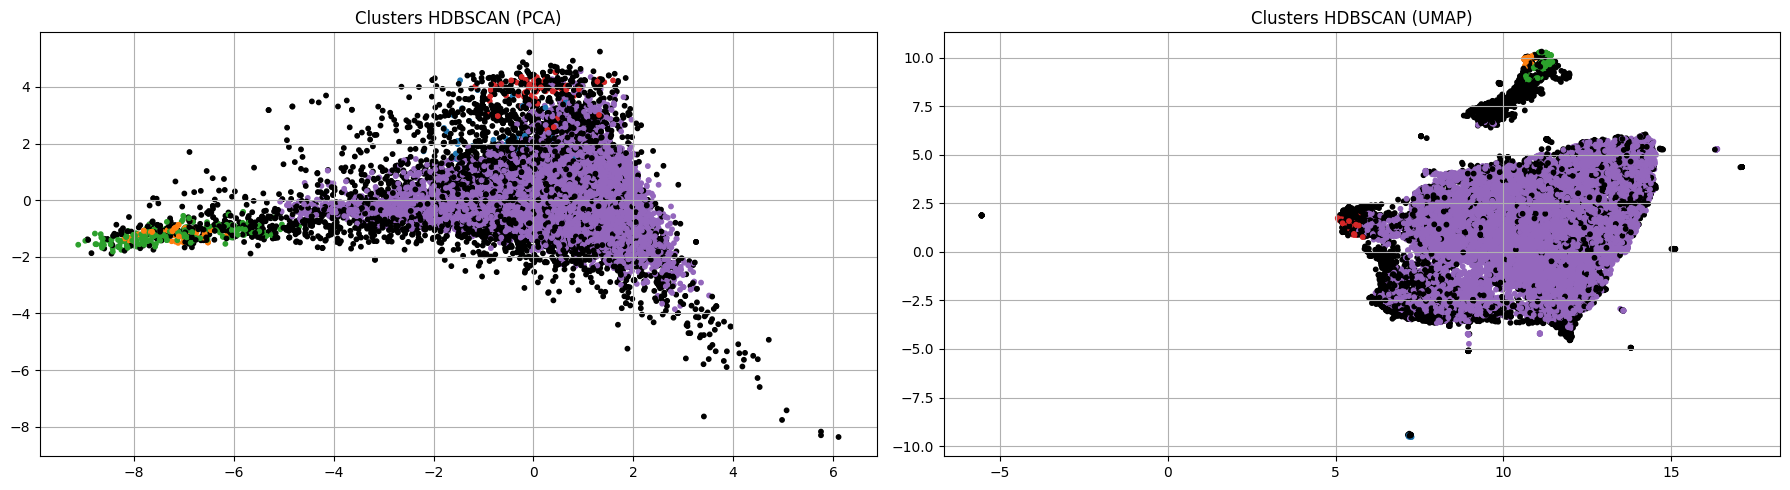

In [ ]:

# Cores padrão para clusters (mod 10 para limitar o colormap)
colors = plt.cm.tab10(labels % 10)

# Trocar cor dos outliers (-1) para preto
colors = np.array(colors)
colors[labels == -1] = [0, 0, 0, 1]  # RGBA preto

# Plot
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

axs[0].scatter(X_pca2[:, 0], X_pca2[:, 1], c=colors, s=10)
axs[0].set_title('Clusters HDBSCAN (PCA)')
axs[0].grid(True)

axs[1].scatter(X_umap2[:, 0], X_umap2[:, 1], c=colors, s=10)
axs[1].set_title('Clusters HDBSCAN (UMAP)')
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Máscara para remover outliers
mask = labels != -1

# Aplica o Silhouette Score apenas nos clusters válidos
sil_score = silhouette_score(X4_scaled[mask], labels[mask])
print(f"Silhouette Score (sem outliers): {sil_score:.4f}")

Silhouette Score (sem outliers): 0.3673


In [ ]:
from hdbscan.validity import validity_index

# Aplica o índice de validade DBCV (também excluindo outliers)
dbcv_score = validity_index(X4_scaled[mask], labels[mask], metric='euclidean')
print(f"DBCV: {dbcv_score:.4f}")

DBCV: -0.3124


##Sumário de resultados


In [ ]:
# Ponto de sumarização, acho que seria interessante ter esse resumo geral na hora de falar

# K-Means com 3 gps e 6 gps
print("\nResumo dos grupos formados:")
print("-" * 30)
print("K-Means com 3 grupos (df_cleaned):")
print(df_cleaned['Cluster_kmeans3'].value_counts().sort_index())
print("-" * 30)
print("K-Means com 6 grupos (df_cleaned):")
print(df_cleaned['Cluster_kmeans6'].value_counts().sort_index())
print("-" * 30)

# HDBSCAN
print("HDBSCAN (df_cleaned):")
hdbscan_counts_cleaned = df_cleaned['Cluster_hdbscan'].value_counts().sort_index()
print(hdbscan_counts_cleaned)
print(f"Número de clusters válidos (excluindo outliers): {len(hdbscan_counts_cleaned) - (1 if -1 in hdbscan_counts_cleaned.index else 0)}")
print("-" * 30)

# K-Means on df_analise (without popularity columns)
print("K-Means com 5 grupos (df_analise - sem popularidade):")
print(df_analise['Cluster_kmeans'].value_counts().sort_index())
print("-" * 30)

# HDBSCAN on df_analise (without popularity columns)
print("HDBSCAN (df_analise - sem popularidade):")
# Value counts includes the -1 cluster (outliers)
hdbscan_counts_analise = df_analise['Cluster_hdbscan'].value_counts().sort_index()
print(hdbscan_counts_analise)
# Print number of actual clusters (excluding -1)
print(f"Número de clusters válidos (excluindo outliers): {len(hdbscan_counts_analise) - (1 if -1 in hdbscan_counts_analise.index else 0)}")
print("-" * 30)


Resumo dos grupos formados:
------------------------------
K-Means com 3 grupos (df_cleaned):
Cluster_kmeans3
0     5030
1    11140
2     3381
Name: count, dtype: int64
------------------------------
K-Means com 6 grupos (df_cleaned):
Cluster_kmeans6
0    4315
1    4613
2     787
3    8651
4      97
5    1088
Name: count, dtype: int64
------------------------------
HDBSCAN (df_cleaned):
Cluster_hdbscan
-1     4413
 0      408
 1    14730
Name: count, dtype: int64
Número de clusters válidos (excluindo outliers): 2
------------------------------
K-Means com 5 grupos (df_analise - sem popularidade):
Cluster_kmeans
0    3468
1    3894
2     767
3    6768
4    4654
Name: count, dtype: int64
------------------------------
HDBSCAN (df_analise - sem popularidade):
Cluster_hdbscan
-1     5416
 0       51
 1       53
 2      206
 3       72
 4    13753
Name: count, dtype: int64
Número de clusters válidos (excluindo outliers): 5
------------------------------


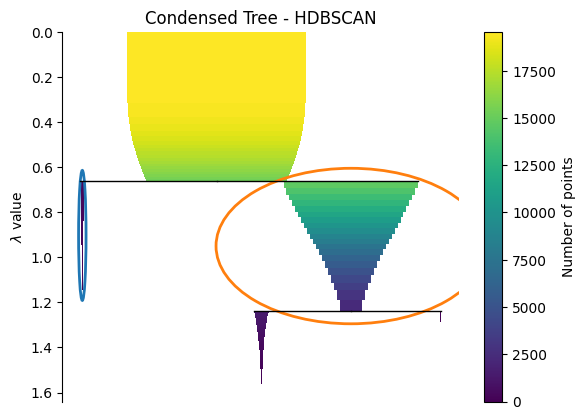

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
# Visualiza a estrutura hierárquica com o condensed tree
clusterer.condensed_tree_.plot(select_clusters=True,
                                selection_palette=sns.color_palette("tab10", 10))
plt.title('Condensed Tree - HDBSCAN')
plt.show()


Laranja, Verde, Vermelho, Roxo, etc.: Estes são os clusters que se formam abaixo do limiar de distância padrão. A função identificou que esses "galhos" são distintos o suficiente para receberem sua própria cor.

Azul: As linhas azuis no topo do gráfico representam as fusões finais entre esses grandes grupos coloridos. Por exemplo, o grande grupo laranja e o grupo verde/vermelho/roxo se fundem através de uma linha azul bem no topo. Isso indica que a fusão entre eles ocorreu acima do limiar de distância, ou seja, eles são muito diferentes um do outro.

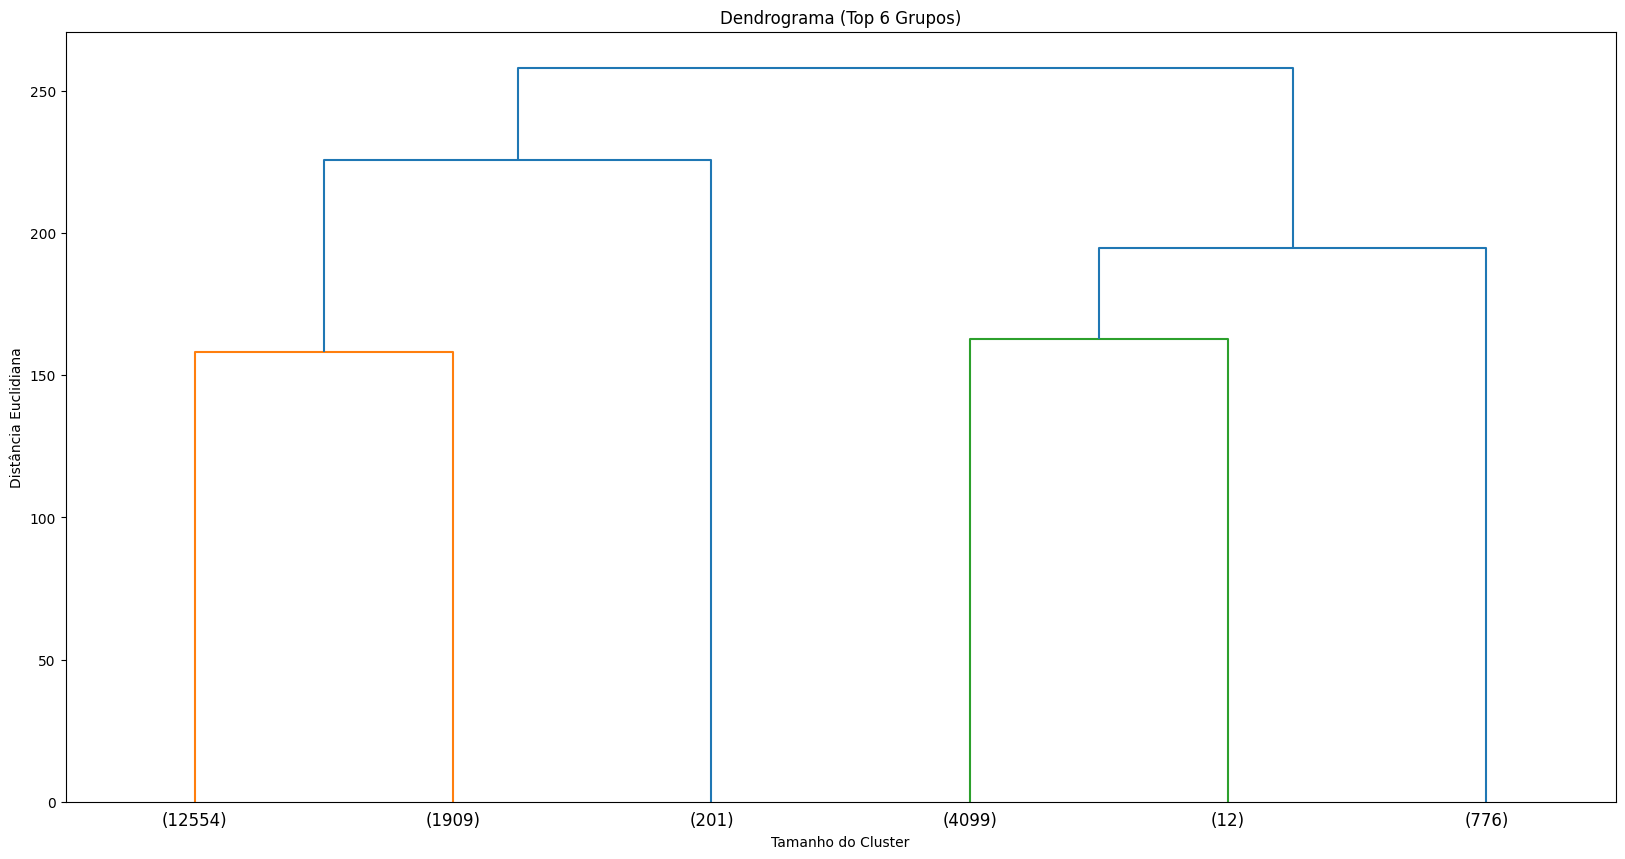

In [ ]:
# Plota o dendrograma mostrando apenas os 6 primeiros grandes grupos
plt.figure(figsize=(20, 10))
dendrogram(linked,
           truncate_mode='lastp',  # Mostrar apenas os 'p' últimos nós
           p=6,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

plt.title('Dendrograma (Top 6 Grupos)')
plt.xlabel('Tamanho do Cluster')
plt.ylabel('Distância Euclidiana')
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score

# Comparando K-Means k=3 vs k=6 no df_cleaned
labels_k3 = df_cleaned['Cluster_kmeans3']
labels_k6 = df_cleaned['Cluster_kmeans6']

ari_score = adjusted_rand_score(labels_k3, labels_k6)

print(f"O Adjusted Rand Index entre k=3 e k=6 é: {ari_score:.4f}")

# Filtrando os outliers do HDBSCAN
df_temp = df_cleaned[df_cleaned['Cluster_hdbscan'] != -1]

labels_k3_filtered = df_temp['Cluster_kmeans3']
labels_hdbscan_filtered = df_temp['Cluster_hdbscan']

ari_score_hdbscan = adjusted_rand_score(labels_k3_filtered, labels_hdbscan_filtered)
print(f"O ARI entre K-Means(k=3) e HDBSCAN (sem outliers) é: {ari_score_hdbscan:.4f}")

O Adjusted Rand Index entre k=3 e k=6 é: 0.5544
O ARI entre K-Means(k=3) e HDBSCAN (sem outliers) é: 0.0528


In [ ]:
from sklearn.metrics import rand_score, adjusted_rand_score

labels_k3_filtered = df_temp['Cluster_kmeans3']
labels_hdbscan_filtered = df_temp['Cluster_hdbscan']

# Calculando o Rand Index (não ajustado)
ri_score = rand_score(labels_k3_filtered, labels_hdbscan_filtered)

# Calculando o ARI para comparação direta
ari_score = adjusted_rand_score(labels_k3_filtered, labels_hdbscan_filtered)


print(f"Rand Index (NÃO AJUSTADO): {ri_score:.4f}")
print(f"Rand Index (AJUSTADO)    : {ari_score:.4f}")

Rand Index (NÃO AJUSTADO): 0.4657
Rand Index (AJUSTADO)    : 0.0528


In [ ]:
media_por_cluster = df_cleaned.groupby('Cluster_hdbscan').mean(numeric_only=True)

In [ ]:
media_por_cluster

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness,Cluster_kmeans6,Cluster_kmeans3
Cluster_hdbscan,,,,,,,,,,,,,,,,,
-1,0.602570,0.624209,-8.351243,0.138063,0.309337,0.134842,0.231793,0.505731,123.845017,4.184967,2.824172e+08,1.965748e+06,92323.554271,3.173238e+08,5.429004,2.322683,0.917290
0,0.290330,0.096198,-25.282841,0.042696,0.931841,0.888078,0.104400,0.121275,100.662493,3.182105,4.611862e+06,5.487942e+04,2143.080882,2.748477e+07,0.930763,1.997549,2.000000
1,0.636832,0.653422,-6.934471,0.084315,0.265299,0.007942,0.181417,0.548256,120.195008,3.624488,4.185566e+07,2.988805e+05,9183.864969,8.660835e+07,5.238572,1.826409,0.885132


In [ ]:
for cluster_id, group in df_cleaned.groupby('Cluster_hdbscan'):
    print(f"\nCluster {cluster_id} (total de {len(group)} membros):")
    display(group.sample(n=min(3, len(group)), random_state=42))  # Em Jupyter
    # ou, se não estiver usando Jupyter:
    print(group.sample(n=min(100, len(group)), random_state=42).to_string())



Cluster -1 (total de 4413 membros):


,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon,Cluster_kmeans6,Cluster_kmeans3,Cluster_hdbscan
12395,Miley Cyrus,Wrecking Ball,Bangerz (Deluxe Version),album,0.530,0.422,-6.262,0.0342,0.4070,0.000000,...,6871536.0,1090717.0,True,True,691252064.0,3.943925,Youtube,5,1,-1
12261,Lindsey Stirling,Carol Of The Bells,Warmer In The Winter (Deluxe Edition),album,0.227,0.660,-5.993,0.0759,0.0274,0.000538,...,2291850.0,38938.0,True,True,57662009.0,8.386277,Youtube,3,1,-1
18621,Sidhu Moose Wala,Same Beef,Same Beef,single,0.779,0.854,-4.958,0.2190,0.0462,0.000000,...,5051267.0,164771.0,True,True,58867987.0,4.066667,Youtube,5,1,-1


                        Artist                                                                    Track                                                                 Album   Album_type  Danceability   Energy  Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  Valence    Tempo  Duration_min                                                                                                 Title                                          Channel         Views       Likes   Comments Licensed official_video        Stream  EnergyLiveness most_playedon  Cluster_kmeans6  Cluster_kmeans3  Cluster_hdbscan
12395              Miley Cyrus                                                            Wrecking Ball                                              Bangerz (Deluxe Version)        album        0.5300  0.42200    -6.262       0.0342      0.407000          0.000000    0.1070  0.34900  119.964      3.689333                                                          Miley Cyrus - Wrecking

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon,Cluster_kmeans6,Cluster_kmeans3,Cluster_hdbscan
2818,Claude Debussy,"Rêverie, L. 68",Debussy: Estampes; Pour le piano; 6 épigraphes...,album,0.2500,0.00904,-31.617,0.0410,0.995,0.922,...,107236.0,3080.0,False,False,40399275.0,0.116046,Spotify,2,2,0
6638,Gavin Greenaway,Earth,Gladiator: 20th Anniversary Edition,album,0.0876,0.05040,-29.690,0.0387,0.755,0.950,...,1379.0,146.0,False,False,24422351.0,0.450000,Spotify,2,2,0
7141,Thomas Newman,Road To Perdition,Road To Perdition (Original Motion Picture Sou...,album,0.1510,0.10300,-22.221,0.0412,0.918,0.852,...,8513.0,698.0,False,False,10440867.0,1.362434,Spotify,2,2,0


                                    Artist                                                                                                                 Track                                                                                                 Album   Album_type  Danceability   Energy  Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  Valence    Tempo  Duration_min                                                                                                 Title                                Channel       Views      Likes  Comments Licensed official_video       Stream  EnergyLiveness most_playedon  Cluster_kmeans6  Cluster_kmeans3  Cluster_hdbscan
2818                        Claude Debussy                                                                                                        Rêverie, L. 68                                               Debussy: Estampes; Pour le piano; 6 épigraphes antiques        album        0.2500  0.00904   -31.617    

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon,Cluster_kmeans6,Cluster_kmeans3,Cluster_hdbscan
6733,DENNIS,Malandramente,Malandramente,single,0.910,0.804,-4.760,0.0996,0.177,0.0,...,969005.0,42936.0,False,True,65709485.0,3.960591,Youtube,3,1,1
12830,MIKA,Bolero (feat. MIKA),Donna sulla Luna,album,0.817,0.710,-5.354,0.1350,0.167,0.0,...,68863.0,2074.0,True,True,9065262.0,3.837838,Youtube,3,1,1
12460,Banda MS de Sergio Lizárraga,Me Dejé Ir Con Todo,PUNTO Y APARTE,album,0.527,0.466,-6.143,0.0384,0.472,0.0,...,28413.0,341.0,True,True,8575574.0,1.612457,Spotify,1,0,1


                                        Artist                                                              Track                                                                              Album   Album_type  Danceability  Energy  Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  Valence    Tempo  Duration_min                                                                                              Title                                 Channel        Views      Likes  Comments Licensed official_video       Stream  EnergyLiveness most_playedon  Cluster_kmeans6  Cluster_kmeans3  Cluster_hdbscan
6733                                    DENNIS                                                      Malandramente                                                                      Malandramente       single         0.910   0.804    -4.760       0.0996      0.177000          0.000000    0.2030   0.7120  129.929      2.861533                            Dennis e Mc's Nandinho &